# Importing the data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,roc_auc_score,f1_score,roc_curve

data=pd.read_csv("Cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Observing the data and checking out null values

In [2]:
data=data.iloc[:,1:-1]
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Encoding Categorical Variables.

In [3]:
print(data['diagnosis'].value_counts())
mapping={
    'B':0,
    'M':1
}

data['diagnosis']=data['diagnosis'].map(mapping)


diagnosis
B    357
M    212
Name: count, dtype: int64


# Standardizing the Data

In [4]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Logistic Regression

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

best_recall = 0
best_C = None
best_model = None
best_threshold = 0.5

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train, y_train)
    
    y_val_prob = lr.predict_proba(X_valid)[:, 1]
    thresholds = np.arange(0.1, 0.91, 0.01)
    for t in thresholds:
        y_val_pred = (y_val_prob >= t).astype(int)
        recall = recall_score(y_valid, y_val_pred)
        
        if recall > best_recall:
            best_recall = recall
            best_C = C
            best_threshold = t
            best_model = lr

print(f"\nBest C: {best_C}")
print(f"Best threshold for recall: {best_threshold:.2f}")
print(f"Best Recall on validation: {best_recall:.3f}")



Best C: 0.001
Best threshold for recall: 0.10
Best Recall on validation: 1.000



Confusion Matrix:
 [[ 0 72]
 [ 0 42]]
ROC-AUC Score: 0.994
Precision: 0.368
Recall:    1.000
F1 Score:  0.538


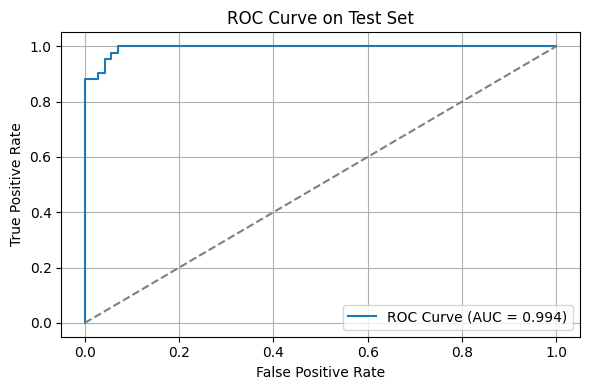

In [6]:
y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= best_threshold).astype(int)

cm = confusion_matrix(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nConfusion Matrix:\n", cm)
print(f"ROC-AUC Score: {roc_auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()